# Importing Libraries

In [1]:
from fitizens_libraries.load_and_process_training_data import load_training_data
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pycaret.classification import *

# Creating Auxiliary Functions

In [2]:
def create_custom_dataframe(series):
    df =  series[["linAccX", "linAccY", "linAccZ", "gyroX", "gyroY", "gyroZ", "magnX", "magnY", "magnZ"]]
    return df

In [3]:
def create_training_data_stats(df, target):
    stats_dict = {}
    series = create_custom_dataframe(df)
    
    for column in series.columns:
        mean = series[column].mean()
        std = series[column].std()
        median = series[column].median()
        skewness = series[column].skew()
        kurtosis = series[column].kurtosis()

        min_val = series[column].min()
        max_val = series[column].max()
        range_val = max_val - min_val
        quartile_25 = np.percentile(series[column], 25)
        quartile_75 = np.percentile(series[column], 75)
        iqr = quartile_75 - quartile_25
    

        stats_dict[f"{column}_mean"] = mean
        stats_dict[f"{column}_std"] = std
        stats_dict[f"{column}_median"] = median
        stats_dict[f"{column}_skewness"] = skewness
        stats_dict[f"{column}_kurtosis"] = kurtosis

        stats_dict[f"{column}_min"] = min_val
        stats_dict[f"{column}_max"] = max_val
        stats_dict[f"{column}_range"] = range_val
        stats_dict[f"{column}_quartile_25"] = quartile_25
        stats_dict[f"{column}_quartile_75"] = quartile_75
        stats_dict[f"{column}_iqr"] = iqr

        log_transform = np.log1p(series[column])
        stats_dict[f"{column}_log_transform_mean"] = log_transform.mean()
        stats_dict[f"{column}_log_transform_std"] = log_transform.std()
        #NULLS BUT WITH BETTER RESULTS WE WILL HANDLE IT IN THE PREPROCESS
        
        
    stats_dict["target"] = target
    return stats_dict

# Loading Data

In [4]:
folder_path = "labeled"
os.makedirs(folder_path, exist_ok=True)
file_names = [f"{folder_path}/{name}" for name in os.listdir(folder_path)]
signals = ["accX", "accY", "accZ", "gyroX", "gyroY", "gyroZ", "magnX", "magnY", "magnZ", "linAccX", "linAccY", "linAccZ"]

data, wk = load_training_data(filelist=file_names,
                         signals= signals,
                          target_exercise="SQUAT", other_exercises=[], is_peak_minima=True)
data[0]

{'series':                          accX_orig  accY_orig  accZ_orig  gyroX_orig  \
 time                                                                   
 1970-01-01 00:00:00.474   0.160325   3.283070  -0.118723  125.159996   
 1970-01-01 00:00:00.483   0.205790   3.405108  -0.348442  129.080002   
 1970-01-01 00:00:00.492   0.198611   3.503217  -0.659520  128.169998   
 1970-01-01 00:00:00.501   0.126824   3.316570  -0.793523  127.049995   
 1970-01-01 00:00:00.510   0.050251   3.295034  -0.860524  129.220001   
 ...                            ...        ...        ...         ...   
 1970-01-01 00:00:01.531  -0.172289   4.699671  -1.432429  -87.920006   
 1970-01-01 00:00:01.540  -0.212969   4.572847  -1.418072  -82.880005   
 1970-01-01 00:00:01.549  -0.222540   4.632670  -1.456358  -80.010002   
 1970-01-01 00:00:01.558  -0.354150   4.661385  -1.987584  -79.730003   
 1970-01-01 00:00:01.567  -0.495332   4.312020  -2.102443  -79.520004   
 
                          gyroY_orig  g

# Creating new data

In [5]:
data_info = [create_training_data_stats(info["series"], info["target"]) for info in data]
data_custom = pd.DataFrame(data_info)
data_custom.head()

,linAccX_mean,linAccX_std,linAccX_median,linAccX_skewness,linAccX_kurtosis,linAccX_min,linAccX_max,linAccX_range,linAccX_quartile_25,linAccX_quartile_75,...,magnZ_kurtosis,magnZ_min,magnZ_max,magnZ_range,magnZ_quartile_25,magnZ_quartile_75,magnZ_iqr,magnZ_log_transform_mean,magnZ_log_transform_std,target
0,0.475693,0.444189,0.604449,-0.401276,-1.071139,-0.443351,1.101143,1.544494,0.088489,0.802861,...,-0.885900,143.976532,172.338581,28.362049,156.192911,170.217893,14.024982,5.096822,0.050854,SQUAT
1,0.436280,0.485130,0.641912,-0.495720,-1.323124,-0.391923,1.005504,1.397426,-0.016156,0.853873,...,-1.175484,147.466909,174.349138,26.882229,157.097965,171.882276,14.784311,5.105311,0.050877,SQUAT
2,0.457903,0.470508,0.604933,-0.665483,-0.833158,-0.493354,1.093954,1.587308,0.076384,0.808222,...,-0.798832,147.541454,173.696903,26.155449,159.302017,171.876924,12.574907,5.111321,0.045672,SQUAT
3,0.504729,0.509760,0.719400,-1.073272,-0.171660,-0.661484,1.102700,1.764185,0.203035,0.838872,...,-1.035485,149.187807,182.399288,33.211481,162.647613,180.053099,17.405486,5.145503,0.059038,SQUAT
4,0.470926,0.481927,0.688152,-1.019928,-0.216717,-0.601809,1.059198,1.661007,0.210912,0.799508,...,-1.012101,150.143214,183.284513,33.141299,163.514686,180.030132,16.515445,5.147590,0.056932,SQUAT


# EDA

In [6]:
data_custom.shape

(3805, 118)

In [7]:
data_custom.isnull().sum()

linAccX_mean                   0
linAccX_std                    0
linAccX_median                 0
linAccX_skewness               0
linAccX_kurtosis               0
                            ... 
magnZ_quartile_75              0
magnZ_iqr                      0
magnZ_log_transform_mean    1747
magnZ_log_transform_std     1747
target                         0
Length: 118, dtype: int64

In [8]:
data_custom.target.value_counts()

NO_EXERCISE    2934
SQUAT           871
Name: target, dtype: int64

In [9]:
corr_matrix = data_custom.drop(columns=["target"],axis=1).corr()
corr_matrix

,linAccX_mean,linAccX_std,linAccX_median,linAccX_skewness,linAccX_kurtosis,linAccX_min,linAccX_max,linAccX_range,linAccX_quartile_25,linAccX_quartile_75,...,magnZ_skewness,magnZ_kurtosis,magnZ_min,magnZ_max,magnZ_range,magnZ_quartile_25,magnZ_quartile_75,magnZ_iqr,magnZ_log_transform_mean,magnZ_log_transform_std
linAccX_mean,1.000000,0.267910,0.929875,0.039823,-0.103947,0.514938,0.697353,0.254080,0.705878,0.844098,...,-0.114659,-0.161994,-0.352290,-0.341645,0.252342,-0.350410,-0.342000,0.282989,0.430913,0.076088
linAccX_std,0.267910,1.000000,0.191259,0.256253,-0.353720,-0.604904,0.828019,0.976220,-0.454803,0.709953,...,-0.413091,-0.403756,-0.183827,-0.152755,0.707341,-0.175540,-0.150997,0.713434,0.350072,0.666232
linAccX_median,0.929875,0.191259,1.000000,-0.186123,-0.063009,0.438728,0.552971,0.184614,0.682918,0.736653,...,-0.058002,-0.108650,-0.282437,-0.274588,0.186839,-0.280802,-0.275421,0.188571,0.409465,-0.064615
linAccX_skewness,0.039823,0.256253,-0.186123,1.000000,-0.374831,0.081624,0.356435,0.230562,-0.189213,0.160264,...,-0.271771,-0.260625,-0.286770,-0.282566,0.104765,-0.284885,-0.277954,0.232682,-0.057686,0.279408
linAccX_kurtosis,-0.103947,-0.353720,-0.063009,-0.374831,1.000000,0.068738,-0.256741,-0.236798,0.261561,-0.327905,...,0.327321,0.436743,0.112891,0.106290,-0.152819,0.110278,0.101133,-0.271784,-0.113757,-0.145859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magnZ_quartile_25,-0.350410,-0.175540,-0.280802,-0.284885,0.110278,-0.184707,-0.391779,-0.200746,-0.183845,-0.309146,...,0.160771,0.220716,0.999892,0.999243,-0.049204,1.000000,0.999382,-0.150085,0.984179,0.002393
magnZ_quartile_75,-0.342000,-0.150997,-0.275421,-0.277954,0.101133,-0.198932,-0.369792,-0.175843,-0.192843,-0.290193,...,0.150253,0.204654,0.999078,0.999873,-0.016594,0.999382,1.000000,-0.115230,0.985768,0.178991
magnZ_iqr,0.282989,0.713434,0.188571,0.232682,-0.271784,-0.375494,0.670247,0.726906,-0.228599,0.573970,...,-0.317074,-0.480933,-0.155573,-0.114878,0.923480,-0.150085,-0.115230,1.000000,0.335529,0.934071
magnZ_log_transform_mean,0.430913,0.350072,0.409465,-0.057686,-0.113757,0.016770,0.452713,0.313390,0.131969,0.517710,...,-0.110690,-0.044480,0.979445,0.986735,0.427749,0.984179,0.985768,0.335529,1.000000,0.107546


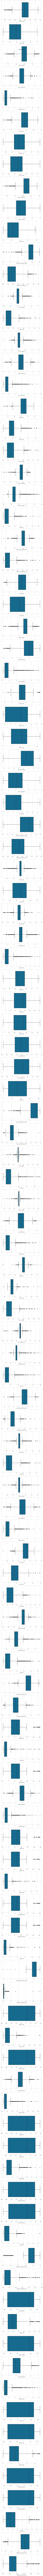

In [10]:
# Create a figure and a set of subplots
df_box = data_custom.drop(columns=["target"],axis=1)
fig, axes = plt.subplots(nrows=len(df_box.columns), ncols=1, figsize=(8, 4 * len(df_box.columns)))

# Create a box plot for each column
for i, col in enumerate(df_box.columns):
    sns.boxplot(x=df_box[col], ax=axes[i])

# Add a title (optional)
fig.suptitle('Box Plots', fontsize=16)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

# ML with Pycaret

In [11]:
data_dev = data_custom.sample(frac=0.95, random_state=786)
data_prod = data_custom.drop(data_dev.index)

data_dev.reset_index(inplace=True, drop=True)
data_prod.reset_index(inplace=True, drop=True)

print('Data for Modeling: ' + str(data_dev.shape))
print('Simulated data For Production ' + str(data_prod.shape))

Data for Modeling: (3615, 118)
Simulated data For Production (190, 118)


In [12]:
model = setup(
    # Basic options
    data = data_dev,
    target = "target",
    train_size = 0.7,
    preprocess = True,
    session_id=123,

     # Dealing with missing values
    imputation_type = 'simple',
    
    # Dealing with multicollinearity
    remove_multicollinearity = True,
    multicollinearity_threshold = 0.9,
        
    # Feature normalization with outliers
    normalize = True,
    normalize_method = 'robust',
        
    # Paralellization options
    n_jobs = - 1,
    use_gpu = False,

    #n_jobs = -1: Utilizes all available CPU cores for parallel processing in tasks like model training.
    #use_gpu = False: Specifies not to use the GPU for computation; the code will stick to using the CPU.
    
    # Imbalance Dataset
    fix_imbalance=True,
    fix_imbalance_method = 'SMOTE', 

    # Outlier removal
    remove_outliers = False,
    outliers_threshold = 0.05,
    
    # Feature Importance
    feature_selection = True,
    n_features_to_select= 10
)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Target mapping,"NO_EXERCISE: 0, SQUAT: 1"
4,Original data shape,"(3615, 118)"
5,Transformed data shape,"(5005, 11)"
6,Transformed train set shape,"(3920, 11)"
7,Transformed test set shape,"(1085, 11)"
8,Numeric features,117
9,Rows with missing values,62.5%


In [13]:
models = compare_models(sort="F1", fold=5)
models

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9964,0.9995,0.9912,0.9930,0.9921,0.9898,0.9898,1.4880
rf,Random Forest Classifier,0.9960,0.9971,0.9895,0.9930,0.9912,0.9886,0.9887,2.8280
knn,K Neighbors Classifier,0.9953,0.9959,0.9895,0.9895,0.9895,0.9864,0.9864,9.7300
catboost,CatBoost Classifier,0.9953,0.9993,0.9895,0.9895,0.9895,0.9864,0.9864,12.2020
ada,Ada Boost Classifier,0.9933,0.9950,0.9825,0.9877,0.9850,0.9807,0.9808,2.4480
xgboost,Extreme Gradient Boosting,0.9933,0.9977,0.9825,0.9877,0.9850,0.9807,0.9807,1.5740
gbc,Gradient Boosting Classifier,0.9925,0.9974,0.9842,0.9825,0.9833,0.9785,0.9785,2.8720
lightgbm,Light Gradient Boosting Machine,0.9925,0.9977,0.9772,0.9894,0.9832,0.9783,0.9784,4.5960
dt,Decision Tree Classifier,0.9905,0.9858,0.9772,0.9807,0.9789,0.9728,0.9728,20.1780
nb,Naive Bayes,0.9862,0.9944,0.9754,0.9647,0.9698,0.9608,0.9611,28.5400


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

In [14]:
cnt_models_df = pull()
cnt_models_df

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9964,0.9995,0.9912,0.9930,0.9921,0.9898,0.9898,1.488
rf,Random Forest Classifier,0.9960,0.9971,0.9895,0.9930,0.9912,0.9886,0.9887,2.828
knn,K Neighbors Classifier,0.9953,0.9959,0.9895,0.9895,0.9895,0.9864,0.9864,9.730
catboost,CatBoost Classifier,0.9953,0.9993,0.9895,0.9895,0.9895,0.9864,0.9864,12.202
ada,Ada Boost Classifier,0.9933,0.9950,0.9825,0.9877,0.9850,0.9807,0.9808,2.448
xgboost,Extreme Gradient Boosting,0.9933,0.9977,0.9825,0.9877,0.9850,0.9807,0.9807,1.574
gbc,Gradient Boosting Classifier,0.9925,0.9974,0.9842,0.9825,0.9833,0.9785,0.9785,2.872
lightgbm,Light Gradient Boosting Machine,0.9925,0.9977,0.9772,0.9894,0.9832,0.9783,0.9784,4.596
dt,Decision Tree Classifier,0.9905,0.9858,0.9772,0.9807,0.9789,0.9728,0.9728,20.178
nb,Naive Bayes,0.9862,0.9944,0.9754,0.9647,0.9698,0.9608,0.9611,28.540


In [15]:
clf = create_model('et', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9980,1.0000,0.9912,1.0000,0.9956,0.9943,0.9943
1,0.9921,0.9983,0.9825,0.9825,0.9825,0.9774,0.9774
2,0.9960,1.0000,1.0000,0.9828,0.9913,0.9887,0.9888
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9960,0.9993,0.9825,1.0000,0.9912,0.9886,0.9887
Mean,0.9964,0.9995,0.9912,0.9930,0.9921,0.9898,0.9898
Std,0.0026,0.0007,0.0078,0.0085,0.0058,0.0075,0.0075


In [16]:
tuned_clf = tune_model(clf, optimize = 'F1', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9980,0.9999,0.9912,1.0000,0.9956,0.9943,0.9943
1,0.9901,0.9983,0.9825,0.9739,0.9782,0.9718,0.9718
2,0.9960,1.0000,1.0000,0.9828,0.9913,0.9887,0.9888
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9960,0.9990,0.9825,1.0000,0.9912,0.9886,0.9887
Mean,0.9960,0.9994,0.9912,0.9913,0.9912,0.9887,0.9887
Std,0.0033,0.0007,0.0078,0.0110,0.0073,0.0094,0.0094


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


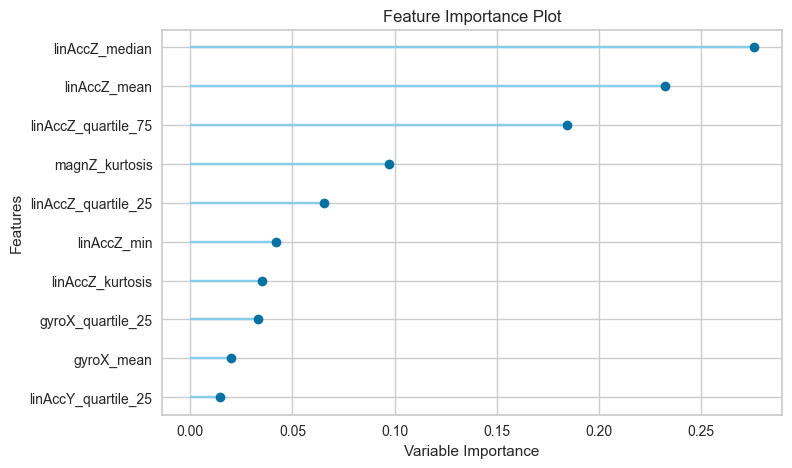

In [17]:
# Get feature importance
plot_model(tuned_clf, plot='feature')

In [18]:
print("Total of features: ", len(tuned_clf.feature_importances_))

Total of features:  10


In [19]:
evaluate_model(tuned_clf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Save Model

In [20]:
# We finalize model (we train on the whole set)
model_final = finalize_model(tuned_clf)

In [21]:
# Export the PyCaret model
save_model(model_final, 'squats_traditional')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['linAccX_mean', 'linAccX_std',
                                              'linAccX_median',
                                              'linAccX_skewness',
                                              'linAccX_kurtosis', 'linAccX_min',
                                              'linAccX_max', 'linAccX_range',
                                              'linAccX_qua...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='sqrt',
                             

# Use in Production

In [22]:
# Load the model
pipeline = load_model(model_name="squats_traditional")

Transformation Pipeline and Model Successfully Loaded


In [23]:
# Utilizar modelo
prediction = predict_model(pipeline, data_prod, raw_score=True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9895,0.9992,0.9895,0.9896,0.9894,0.9744,0.9747


In [24]:
prediction

,linAccX_mean,linAccX_std,linAccX_median,linAccX_skewness,linAccX_kurtosis,linAccX_min,linAccX_max,linAccX_range,linAccX_quartile_25,linAccX_quartile_75,...,magnZ_range,magnZ_quartile_25,magnZ_quartile_75,magnZ_iqr,magnZ_log_transform_mean,magnZ_log_transform_std,target,prediction_label,prediction_score_NO_EXERCISE,prediction_score_SQUAT
0,0.456994,0.518119,0.687853,-0.849364,-0.680970,-0.619502,1.032410,1.651913,0.044448,0.858535,...,29.037661,161.307510,175.953293,14.645782,5.130092,0.050881,1,SQUAT,0.0,1.0
1,0.435078,0.644106,0.572391,-0.277906,-1.512552,-0.576294,1.190314,1.766608,-0.227326,1.068200,...,26.552193,159.039001,172.890732,13.851722,5.114191,0.047904,1,SQUAT,0.0,1.0
2,0.525479,0.442871,0.755463,-0.711532,-1.089867,-0.357406,0.974092,1.331498,0.114188,0.889076,...,27.403730,160.453094,172.379059,11.925961,5.115415,0.046478,1,SQUAT,0.0,1.0
3,0.493536,0.571566,0.734685,-0.316329,-1.527241,-0.360739,1.233528,1.594268,-0.115043,0.956757,...,19.790386,176.170395,184.554550,8.384145,5.197364,0.030125,1,SQUAT,0.0,1.0
4,0.548302,0.711540,0.857918,-0.391805,-1.431596,-0.667626,1.452989,2.120615,-0.200086,1.100154,...,27.337912,175.831375,189.516418,13.685034,5.209777,0.044111,1,SQUAT,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,-0.162655,0.072352,-0.135040,-1.910251,2.988928,-0.388050,-0.093026,0.295024,-0.182413,-0.115682,...,6.700895,75.779160,76.683220,0.904062,4.352386,0.019411,0,NO_EXERCISE,1.0,0.0
186,-0.308690,0.378967,-0.436400,0.225281,-1.660031,-0.780958,0.225115,1.006073,-0.654900,0.109570,...,10.487078,80.740517,88.707909,7.967388,4.450725,0.045831,0,NO_EXERCISE,1.0,0.0
187,-0.459555,0.084026,-0.465768,0.291496,-1.018091,-0.583064,-0.307778,0.275287,-0.529610,-0.403915,...,4.537140,77.184067,78.552551,1.368483,4.369188,0.013961,0,NO_EXERCISE,1.0,0.0
188,-0.412204,0.189204,-0.355586,-0.218704,-1.488596,-0.682565,-0.148596,0.533969,-0.630439,-0.247821,...,5.128220,77.127151,79.042496,1.915343,4.371598,0.017435,0,NO_EXERCISE,1.0,0.0


# Scores

In [ ]:
true_labels = prediction["target"]
predictions = prediction["prediction_label"]

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(true_labels, predictions)
positive_class_label = "SQUAT"
precision = precision_score(true_labels, predictions, pos_label=positive_class_label)
recall = recall_score(true_labels, predictions, pos_label=positive_class_label)
f1 = f1_score(true_labels, predictions, pos_label=positive_class_label)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

In [ ]:
from sklearn.metrics import roc_auc_score

predictions_prob = prediction["prediction_score_SQUAT"]
binary_true_labels = true_labels.map({"SQUAT": 1, "NO_EXERCISE": 0})
auc_score = roc_auc_score(binary_true_labels, predictions_prob)

print(f"AUC: {auc_score}")